In [1]:
try:
    import pandas
except:
    !pip install pandas
try:
    import matplotlib
except:
    !pip install matplotlib
    
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw = pd.read_csv("https://lp-prod-resources.s3.amazonaws.com/250/43958/2021-02-04-19-15-15/H1.csv")

In [3]:
raw.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,...,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,...,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
grouped = raw.groupby(["ArrivalDateYear", "ArrivalDateWeekNumber"], as_index=False)

In [5]:
cancellations = grouped["IsCanceled"].sum()

In [6]:
cancellations.describe()

,ArrivalDateYear,ArrivalDateWeekNumber,IsCanceled
count,115.000000,115.000000,115.000000
mean,2016.069565,27.313043,96.713043
std,0.734151,14.807754,45.865510
min,2015.000000,1.000000,14.000000
25%,2016.000000,15.000000,64.000000
50%,2016.000000,28.000000,95.000000
75%,2017.000000,39.000000,127.500000
max,2017.000000,53.000000,222.000000


In [7]:
cancellations.head()

,ArrivalDateYear,ArrivalDateWeekNumber,IsCanceled
0,2015,27,41
1,2015,28,48
2,2015,29,87
3,2015,30,74
4,2015,31,101


In [8]:
# assuming years >= 0
cancellations["Date(YYYYWW)"] = cancellations["ArrivalDateYear"].astype("string").str.cat(
        cancellations["ArrivalDateWeekNumber"].apply(lambda x: f"{x:02d}")
    )
cancellations["Date(YYYYWW)"].str.len().unique()

<IntegerArray>
[6]
Length: 1, dtype: Int64

In [9]:
cancellations.head()

,ArrivalDateYear,ArrivalDateWeekNumber,IsCanceled,Date(YYYYWW)
0,2015,27,41,201527
1,2015,28,48,201528
2,2015,29,87,201529
3,2015,30,74,201530
4,2015,31,101,201531


In [10]:
out = cancellations[["Date(YYYYWW)", "IsCanceled"]]

In [11]:
out.head()

,Date(YYYYWW),IsCanceled
0,201527,41
1,201528,48
2,201529,87
3,201530,74
4,201531,101


In [12]:
out.describe(include="all")

,Date(YYYYWW),IsCanceled
count,115,115.000000
unique,115,NaN
top,201527,NaN
freq,1,NaN
mean,NaN,96.713043
std,NaN,45.865510
min,NaN,14.000000
25%,NaN,64.000000
50%,NaN,95.000000
75%,NaN,127.500000


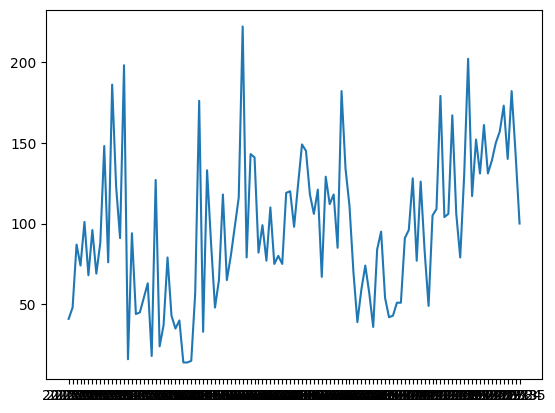

In [13]:
plt.plot("Date(YYYYWW)", "IsCanceled", data = out)
# TODO: toy with x_ticks

In [14]:
# we can try use YYYY*10 + MM approach instead if we need int instead of categorical vals

In [15]:
# assuming years >= 0
cancellations["Date(YW)"] = 100*cancellations["ArrivalDateYear"] + cancellations["ArrivalDateWeekNumber"]
cancellations["Date(YW)"].describe()

count       115.000000
mean     201634.269565
std          66.605058
min      201527.000000
25%      201602.500000
50%      201631.000000
75%      201706.500000
max      201735.000000
Name: Date(YW), dtype: float64

In [16]:
out_i = cancellations[["Date(YW)", "IsCanceled"]]

In [17]:
out_i.head()

,Date(YW),IsCanceled
0,201527,41
1,201528,48
2,201529,87
3,201530,74
4,201531,101


In [18]:
out_i.describe()

,Date(YW),IsCanceled
count,115.000000,115.000000
mean,201634.269565,96.713043
std,66.605058,45.865510
min,201527.000000,14.000000
25%,201602.500000,64.000000
50%,201631.000000,95.000000
75%,201706.500000,127.500000
max,201735.000000,222.000000


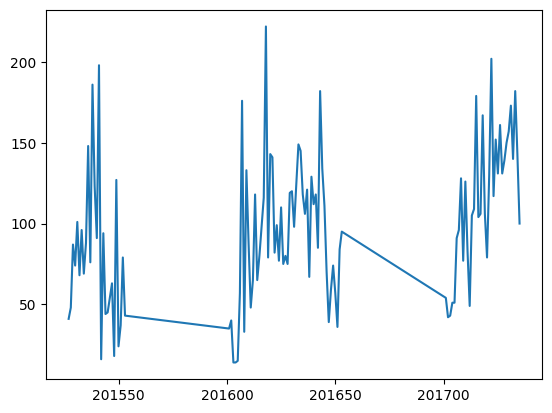

In [19]:
plt.plot("Date(YW)", "IsCanceled", data = out_i)

In [20]:
# possibly, there's no sense in having non-categorical out_i as it there can be gaps